In [1]:
import pandas as pd
import numpy as np
import cv2 as cv2
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import os 
import geopandas as gpd

import scipy.stats as stats
import statsmodels.api as sm
import pylab as py
from vincenty import vincenty

from tqdm import tqdm

%matplotlib inline

/Users/eleonoradetic/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
from evaluation import get_pictures

Uspješno importan modul :D


In [3]:
os.chdir('/Users/eleonoradetic/LUMEN_DS_2022/Evaluation')
data = pd.read_csv('./predictions.csv') # Inference Output, DataFrame with 5 columns
data = data.drop(["distance"], axis=1) 

data_pic_dir = '/Users/eleonoradetic/DATA_LUMEN/data' 
result_dir = '/Users/eleonoradetic/LUMEN_DS_2022/Evaluation/Report' 

 40%|███▉      | 19/48 [00:24<00:37,  1.29s/it]


KeyboardInterrupt: 

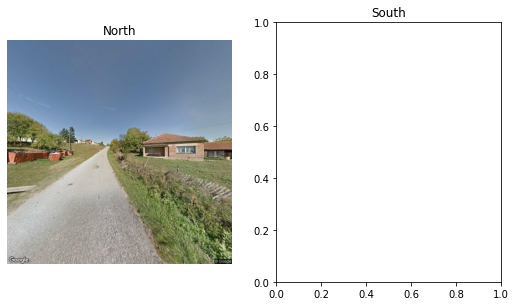

In [4]:
get_pictures(data, result_dir, data_pic_dir)

In [5]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [6]:
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

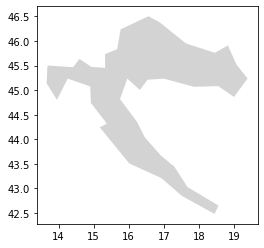

In [12]:
countries[countries["name"] == "Croatia"].plot(color="lightgrey")

In [13]:
data

,uuid,gt_latitude,gt_longitude,mo_latitude,mo_longitude,residuals
0,ef4c4623-693a-4708-a1be-9e00da45eb4f,45.285190,18.396749,45.279739,17.469429,72.758264
1,ca1d6007-da3b-46c5-892a-19c3af85f9d4,45.642258,16.884646,45.489841,16.612061,27.199181
2,b60a55df-bf59-4cca-9195-dbf424caeef4,45.385221,14.912585,45.639874,16.826029,152.169017
3,ca9b95bf-6a73-4f9a-a9f3-8295350115b5,45.401965,16.311548,45.727478,16.788757,51.930679
4,55d17f4f-3adb-4580-841b-e1c38623fb50,46.171555,16.686319,45.472004,18.322803,149.055057
...,...,...,...,...,...,...
4795,802bc74d-0da8-41f4-8e6f-f5fb6b0ebfed,44.742713,15.235081,44.492409,15.987340,65.867148
4796,5f7b3d90-acfd-4785-9d68-8501c05644fc,45.017442,15.417016,45.387566,15.869929,54.389876
4797,3f62c650-12a0-460f-be5d-9523e0c3c3e0,45.582480,16.584884,45.125130,16.793674,53.397435
4798,e0cad326-dd86-4297-8832-2c590124c5d1,45.435105,17.217071,45.583973,16.273849,75.541634


In [14]:
data

,uuid,gt_latitude,gt_longitude,mo_latitude,mo_longitude,residuals
0,ef4c4623-693a-4708-a1be-9e00da45eb4f,45.285190,18.396749,45.279739,17.469429,72.758264
1,ca1d6007-da3b-46c5-892a-19c3af85f9d4,45.642258,16.884646,45.489841,16.612061,27.199181
2,b60a55df-bf59-4cca-9195-dbf424caeef4,45.385221,14.912585,45.639874,16.826029,152.169017
3,ca9b95bf-6a73-4f9a-a9f3-8295350115b5,45.401965,16.311548,45.727478,16.788757,51.930679
4,55d17f4f-3adb-4580-841b-e1c38623fb50,46.171555,16.686319,45.472004,18.322803,149.055057
...,...,...,...,...,...,...
4795,802bc74d-0da8-41f4-8e6f-f5fb6b0ebfed,44.742713,15.235081,44.492409,15.987340,65.867148
4796,5f7b3d90-acfd-4785-9d68-8501c05644fc,45.017442,15.417016,45.387566,15.869929,54.389876
4797,3f62c650-12a0-460f-be5d-9523e0c3c3e0,45.582480,16.584884,45.125130,16.793674,53.397435
4798,e0cad326-dd86-4297-8832-2c590124c5d1,45.435105,17.217071,45.583973,16.273849,75.541634


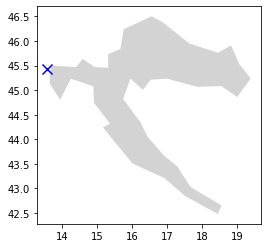

In [21]:
lat, lon = 45.437683, 13.572506
countries[countries["name"] == "Croatia"].plot(color="lightgrey")
plt.scatter(lon, lat, s=100, c='blue', marker='x')
        

In [33]:
uuid = data.iloc[0,0]
dist = data.iloc[0,5]
print(f'{dist:05.1f}_{uuid}.png')

072.8_ef4c4623-693a-4708-a1be-9e00da45eb4f.png


In [32]:
plt.savefig(str(round(data.iloc[i,5],2)) + '.png', dpi = 100)

,uuid,gt_latitude,gt_longitude,mo_latitude,mo_longitude,residuals
0,ef4c4623-693a-4708-a1be-9e00da45eb4f,45.285190,18.396749,45.279739,17.469429,72.758264
1,ca1d6007-da3b-46c5-892a-19c3af85f9d4,45.642258,16.884646,45.489841,16.612061,27.199181
2,b60a55df-bf59-4cca-9195-dbf424caeef4,45.385221,14.912585,45.639874,16.826029,152.169017
3,ca9b95bf-6a73-4f9a-a9f3-8295350115b5,45.401965,16.311548,45.727478,16.788757,51.930679
4,55d17f4f-3adb-4580-841b-e1c38623fb50,46.171555,16.686319,45.472004,18.322803,149.055057
...,...,...,...,...,...,...
4795,802bc74d-0da8-41f4-8e6f-f5fb6b0ebfed,44.742713,15.235081,44.492409,15.987340,65.867148
4796,5f7b3d90-acfd-4785-9d68-8501c05644fc,45.017442,15.417016,45.387566,15.869929,54.389876
4797,3f62c650-12a0-460f-be5d-9523e0c3c3e0,45.582480,16.584884,45.125130,16.793674,53.397435
4798,e0cad326-dd86-4297-8832-2c590124c5d1,45.435105,17.217071,45.583973,16.273849,75.541634
